In [21]:
!pip install -r r.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'r.txt'


Then we can import the `ImageDownloader` and the fastai helper functions.

In [ ]:
from fastai.vision import *
from fastai.widgets import *
import tarfile

In [ ]:
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 8.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.1 which is incompatible.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 0.25.3 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.5.0 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.4.1 which is incompatible.
prophet 1.1 requires pandas>=1.0.4, but you have pandas 0.25.3 which is incompatible.
jaxlib 0.3.14+cuda11.cudnn805 requires scipy>=1.5, but you have

In [ ]:
from fastai.vision import *
from fastai.widgets import *
import tarfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path =( '/content/dataset')

In [ ]:
cd .. 

/


In [ ]:
cd /content/

/content


In [ ]:
cp -r '/content/drive/MyDrive/dataset' '/content/dataset'

In [ ]:
path = Path('/content/')

In [ ]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/dataset'),
 PosixPath('/content/r.txt'),
 PosixPath('/content/drive'),
 PosixPath('/content/sample_data')]

In [ ]:
cd dataset

/content/dataset


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid_pct=0.2, size=224)

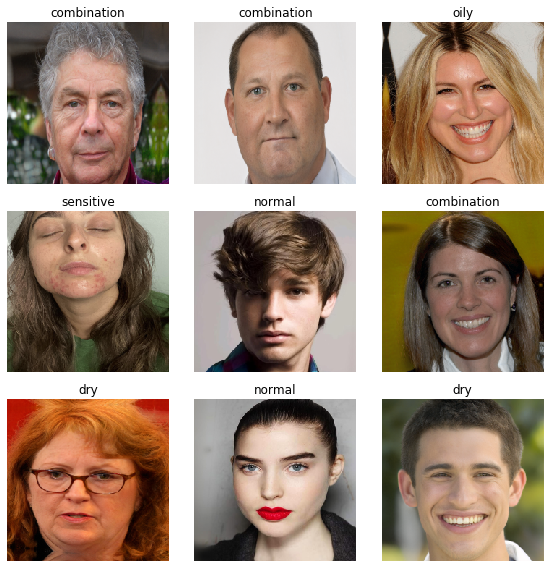

In [ ]:
data.show_batch(rows=3, figsize=(8, 8)) 

In [ ]:
print(data.classes) 

['combination', 'dry', 'normal', 'oily', 'sensitive']


In [ ]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


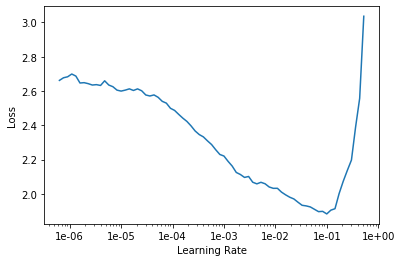

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(cyc_len=10, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.337727,0.435259,0.845115,10:30
1,0.431097,0.564032,0.801827,10:34
2,0.518854,0.505436,0.810167,10:37
3,0.499527,0.565875,0.777601,10:34
4,0.483862,0.431402,0.837569,10:24
5,0.436983,0.604890,0.787927,10:18
6,0.379407,0.371292,0.866958,10:25


In [ ]:
learn.save('tmp_fit-head')

In [ ]:
learn.load('tmp_fit-head');

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


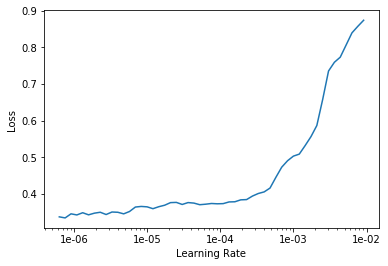

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.429800,0.568032,0.803892,05:27
1,0.518886,0.701781,0.755988,05:30
2,0.469041,0.594181,0.796407,05:33
3,0.373519,0.490734,0.827096,05:32
4,0.304413,0.494595,0.827844,05:31


In [ ]:
learn.save('tmp_fit-all')

In [ ]:
learn.load('tmp_fit-all');

With the unfreezing and repeated fine-tuning we gained a slight boost and achieved 81.2% classification accuracy!

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

We can have a look at the confusion matrix. It tells us which classes the model mixes up:

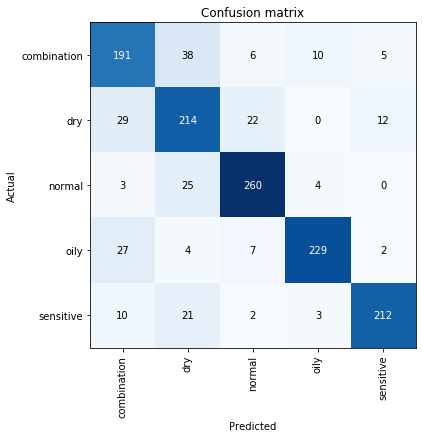

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6))

The confusion matrix looks pretty good. Next, let's look at the worst predictions:


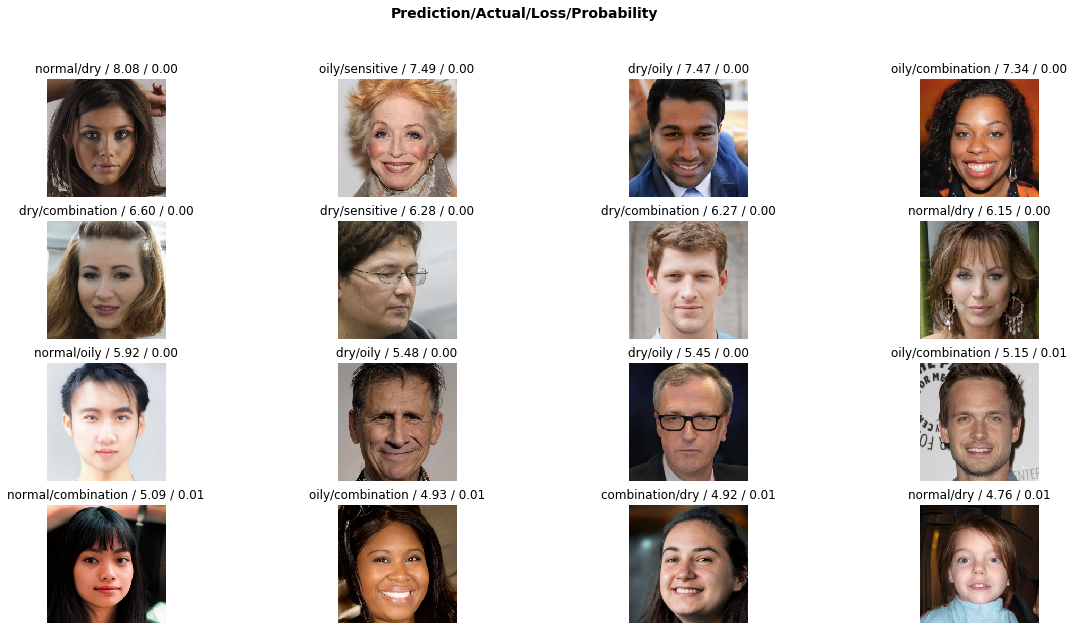

In [ ]:
interp.plot_top_losses(16, figsize=(20,10))

OK we clearly have some quirks in the dataset - let's see if we can clean it up and get a better accuracy.

## Data cleaning
fast.ai also comes with a nifty `ImageCleaner` that we can use to either remove images or correct the labels:

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [ ]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/cleaned.csv'),
 PosixPath('/content/drive'),
 PosixPath('/content/.ipynb_checkpoints'),
 PosixPath('/content/dataset'),
 PosixPath('/content/r.txt'),
 PosixPath('/content/sample_data')]

In [ ]:
data = ImageDataBunch.from_csv(path, csv_labels='cleaned.csv', ds_tfms=tfms, valid_pct=0.2, size=224)

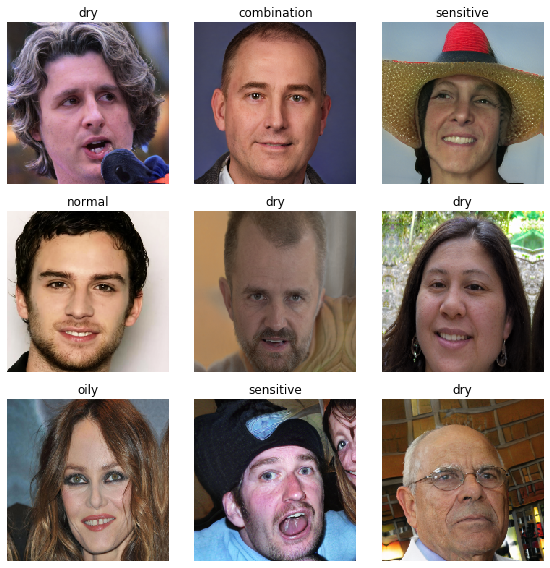

In [ ]:
data.show_batch(rows=3, figsize=(8, 8))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.290612,1.131614,0.677268,04:29
1,0.959531,1.098549,0.652947,04:29
2,0.780272,0.676352,0.747428,04:27
3,0.611787,0.511891,0.788587,04:30
4,0.476314,0.497139,0.798877,04:31


In [ ]:
learn.save('tmp_fit-head-clean')

In [ ]:
learn.load('tmp_fit-head-clean');

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


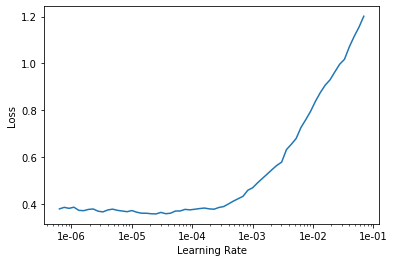

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.404740,0.681076,0.737137,04:28
1,0.452691,0.804601,0.732460,04:26
2,0.421366,0.548156,0.801684,04:24
3,0.354017,0.573779,0.787652,04:25
4,0.268308,0.528880,0.814780,04:27
5,0.207027,0.524229,0.814780,04:24


In [ ]:
learn.save('tmp_fit-all-clean')

In [ ]:
learn.load('tmp_fit-all-clean');

Evidently, the cleaning did not helped give us yet another small boost and achieve **79.9% accuracy**! Also the confusion matrix looks quite acceptable now but can be enhanced if I clean the data above:

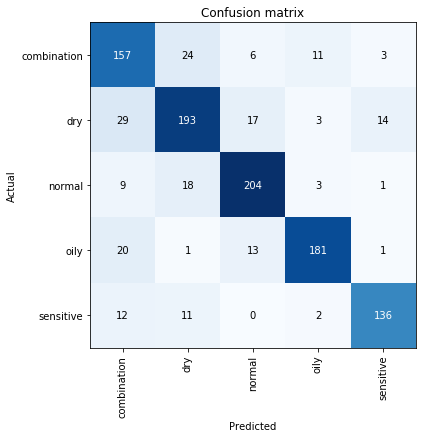

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

In [ ]:
interp.most_confused()

[('dry', 'combination', 29),
 ('combination', 'dry', 24),
 ('oily', 'combination', 20),
 ('normal', 'dry', 18),
 ('dry', 'normal', 17),
 ('dry', 'sensitive', 14),
 ('oily', 'normal', 13),
 ('sensitive', 'combination', 12),
 ('combination', 'oily', 11),
 ('sensitive', 'dry', 11),
 ('normal', 'combination', 9),
 ('combination', 'normal', 6),
 ('combination', 'sensitive', 3),
 ('dry', 'oily', 3),
 ('normal', 'oily', 3),
 ('sensitive', 'oily', 2),
 ('normal', 'sensitive', 1),
 ('oily', 'dry', 1),
 ('oily', 'sensitive', 1)]

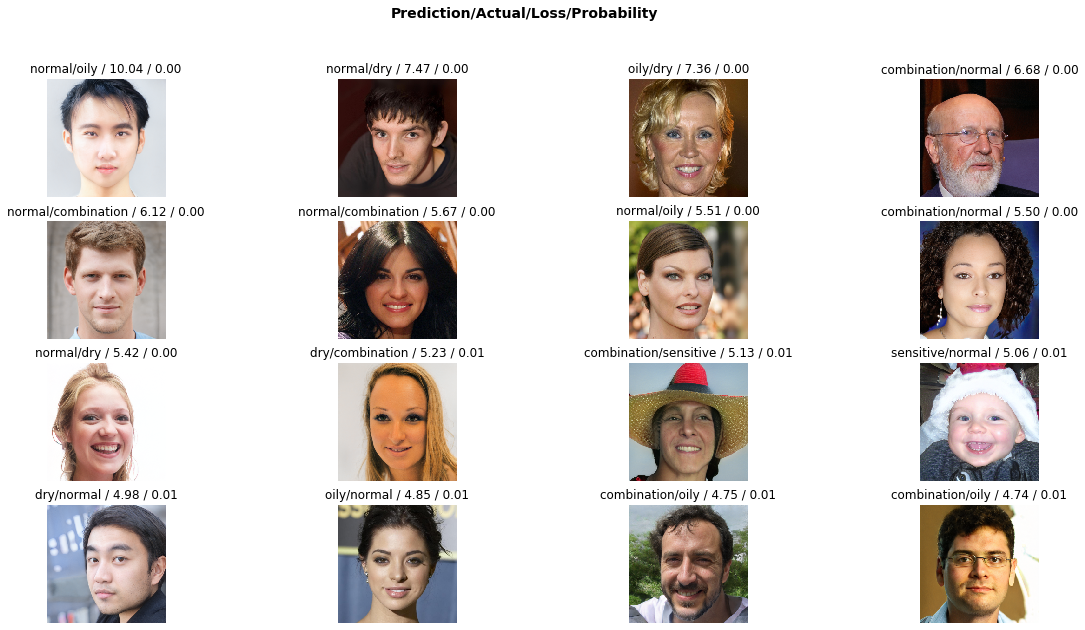

In [ ]:
interp.plot_top_losses(16, figsize=(20,10))

In [ ]:
interp.plot_top_losses(16, figsize=(20,10), largest=False)